In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import ast
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/livecell/test_annotations.csv')

image_id = df['image_id'].sample(n=1).values[0]

n_df = pd.read_csv('/kaggle/input/livecell/test.csv')

image_name = n_df[n_df['id']==image_id]['file_name'].values[0]

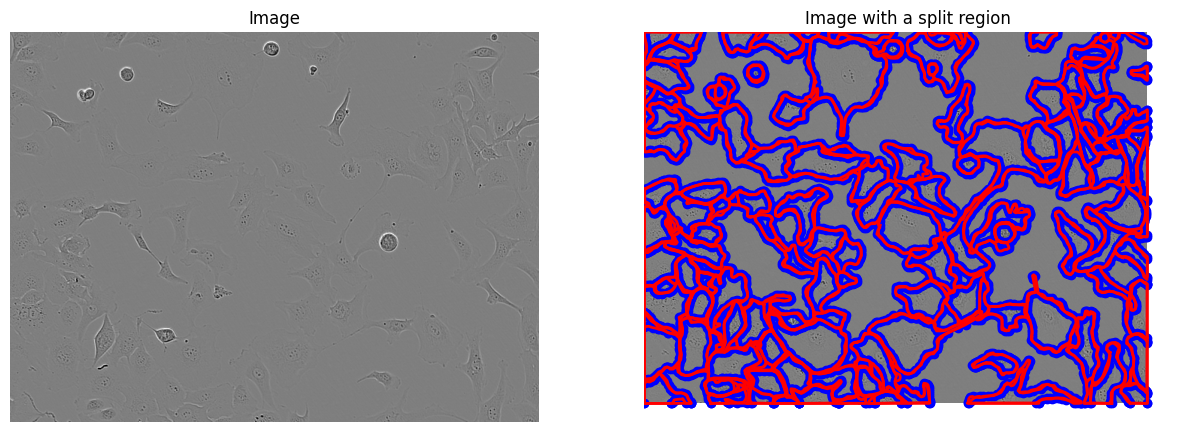

In [3]:
image_path = f'/kaggle/input/livecell/images/images/livecell_test_images/{image_name}'
image = Image.open(image_path)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off') 

plt.subplot(1, 2, 2)
regions_str = list(df[df['image_id'] == image_id]['segmentation'])
regions_list = [ast.literal_eval(reg_str) for reg_str in regions_str]

x_coords = []
y_coords = []
for regions in regions_list:
    x_coord = []
    y_coord = []
    for reg in regions:
        x_coord.append(reg[::2])
        y_coord.append(reg[1::2])
    x_coords.append(x_coord)
    y_coords.append(y_coord)


plt.imshow(image, cmap='gray')

for x_coord, y_coord in zip(x_coords, y_coords):
    for x_c, y_c in zip(x_coord, y_coord):
        plt.plot(x_c + [x_c[0]], y_c + [y_c[0]], 'r-', linewidth=2)
        plt.scatter(x_c, y_c, color='blue')

plt.title('Image with a split region')
plt.axis('off')
plt.show()


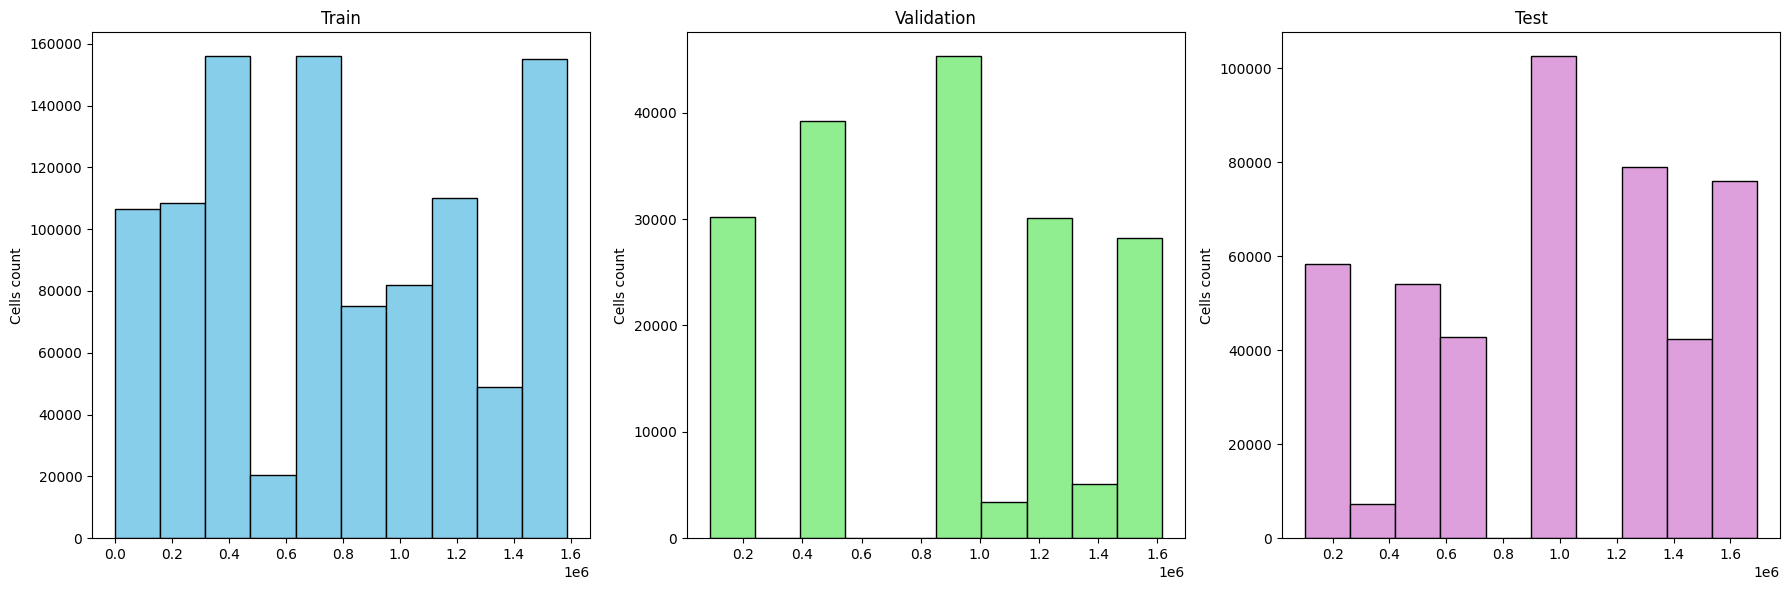

In [4]:
df_train = pd.read_csv('/kaggle/input/livecell/train_annotations.csv')['image_id']

df_val = pd.read_csv('/kaggle/input/livecell/val_annotations.csv')['image_id']

df_test = pd.read_csv('/kaggle/input/livecell/test_annotations.csv')['image_id']


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(df_train, color='skyblue', edgecolor='black')
axes[0].set_title('Train')
axes[0].set_ylabel('Cells count')
axes[0].set_xlabel('')

axes[1].hist(df_val, color='lightgreen', edgecolor='black')
axes[1].set_title('Validation')
axes[1].set_ylabel('Cells count')
axes[1].set_xlabel('')

axes[2].hist(df_test, color='plum', edgecolor='black')
axes[2].set_title('Test')
axes[2].set_ylabel('Cells count')
axes[2].set_xlabel('')

plt.tight_layout()
plt.show()

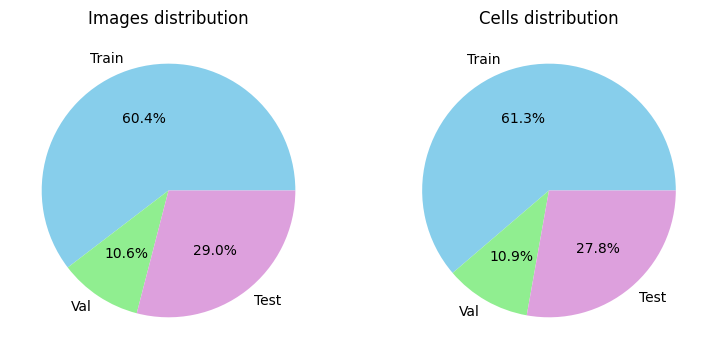

In [23]:
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.pie([len(df_train.unique()), len(df_val.unique()), len(df_test.unique())], labels=['Train', 'Val', 'Test'], autopct='%1.1f%%',
       colors=['skyblue', 'lightgreen', 'plum'])
plt.title('Images distribution')
plt.subplot(1, 2, 2)
plt.pie([len(df_train), len(df_val), len(df_test)], labels=['Train', 'Val', 'Test'], autopct='%1.1f%%',
       colors=['skyblue', 'lightgreen', 'plum'])
plt.title('Cells distribution')
plt.show()